# Practical 4

## Analysing DNA elements to understand transcriptional regulation
---

### Objectives and assessment

In this practical:
* You learn about issues related to processing genome-wide assays and mapping them to a genome reference sequence
* You become familiar with a few file formats that are used for storing genome-wide data
* You work with epigenetic and transcription factor binding data
* You work with transcription factor binding motifs to determine their enrichment in regulatory sequences
* You learn practical approaches to understand transcriptional regulation

### Relevant code
* `twobit.py` Read full genome sequences on the .2bit format
* `bed.py` and `ival.py` File formats for genome wide data; methods for reading and extracting data
* `sym.py` References to the DNA alphabet
* `sequence.py` Biological sequence processing; sequence motifs
* `prob.py` Probability distributions

In [1]:
import sym      # we are going to make reference to sequence alphabets
import sequence # for constructing sequences from genome reference data
import twobit   # for reading genome reference sequence data
import bed      # for processing files on the BED format
import prob     # for motif data
import rcdict   # dictionary of DNA sequence, which does not distinguish between strands

You will be using Numpy and matplotlib, so those standard libraries need to be imported too. We suggest that you make matplotlib plot its plots "in-line" so that visual results are available in the same notebook.

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id="Exercise1"></a>
## Exercise 1: Analysing genome data

Before getting to the exercises we need to gain access to and understand three biologically different types of data. (See the Week 7 notebook for more.)

### Biological data type I: Genome reference data
The portal for the UCSC Genome Browser (http://genome.ucsc.edu) contains the reference sequence and working draft assemblies for a large collection of genomes. We will use the 2009 assembly for human, also referred to as hg19 (see http://hgdownload.soe.ucsc.edu/downloads.html).

The human genome is large (3Gb) so we will use a compressed format known as ‘2bit’ where each base is represented by 2 ‘bits’. Caution: the file is about 800MB. In the computer lab, there will be a USB with it. If you are on campus, you can download the genome from the local server, but the server will struggle if many do this at the same time. You can also download it from UCSC. Make sure you save the file in the notebook directory (or remember to reference it by the directory where you put it).

http://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/hg19.2bit

Fire up Python and use the module `twobit.py` to have a closer look.

In [3]:
hg19 = twobit.TwoBitFile('hg19.2bit')  # assumes that the genome is stored in your current directory
for key in hg19:
    print (key)

chr1
chr2
chr3
chr4
chr5
chr6
chr7
chrX
chr8
chr9
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr20
chrY
chr19
chr22
chr21
chr6_ssto_hap7
chr6_mcf_hap5
chr6_cox_hap2
chr6_mann_hap4
chr6_apd_hap1
chr6_qbl_hap6
chr6_dbb_hap3
chr17_ctg5_hap1
chr4_ctg9_hap1
chr1_gl000192_random
chrUn_gl000225
chr4_gl000194_random
chr4_gl000193_random
chr9_gl000200_random
chrUn_gl000222
chrUn_gl000212
chr7_gl000195_random
chrUn_gl000223
chrUn_gl000224
chrUn_gl000219
chr17_gl000205_random
chrUn_gl000215
chrUn_gl000216
chrUn_gl000217
chr9_gl000199_random
chrUn_gl000211
chrUn_gl000213
chrUn_gl000220
chrUn_gl000218
chr19_gl000209_random
chrUn_gl000221
chrUn_gl000214
chrUn_gl000228
chrUn_gl000227
chr1_gl000191_random
chr19_gl000208_random
chr9_gl000198_random
chr17_gl000204_random
chrUn_gl000233
chrUn_gl000237
chrUn_gl000230
chrUn_gl000242
chrUn_gl000243
chrUn_gl000241
chrUn_gl000236
chrUn_gl000240
chr17_gl000206_random
chrUn_gl000232
chrUn_gl000234
chr11_gl000202_random
chrUn_gl000238
chrUn_gl000244
c

To Python hg19 is a dictionary. The for-loop will show you the main pieces that make up the genome. No prizes for guessing what they correspond to… You can access each chromosome separately, but be careful not to print the actual sequence unless you provide a ‘genome location index’ or ‘range’, as exemplified below. You now have every single base in the human (reference) genome at your fingertips! 

Try to understand what the following three lines actually mean as you execute them. No need to write it down.

In [4]:
hg19['chrX']

In [5]:
len(hg19['chrX'])

155270560

In [6]:
hg19['chrX'][1000000:1000060]

'AAAcagctacttggaaggctgaagcaggaggattgtttgagtctaggagtttgaggctgc'

At this stage you should realise why **you should *not* do this**:
```python
print (hg19['chrX'])
```

### Biological data type II: Gene annotation data

Later we will need to know where genes are placed in the human reference genome, in particular where their transcription start sites are located. 

The UCSC Genome website has a ‘Table browser’ (select menu “Tables”, check the appropriate options—default should do it (knownGene), select BED-browser extensible data output format, click “get output”, select “1” bp upstream, and download file. (`hum_TSS.bed` is already in your data directory.) 

Repeat the download but this time choose 1000 bp upstream, and name the file differently. (`hum_prom.bed` is already in your directory.)

Familiarise yourself with the BED format. You can look at the file in a normal text editor. `bed.py` has functionality to process the data too. Each entry describes a genomic region. Notice that the most basic entry has three fields, namely *Chromosome*, *start locus*, and *end locus*. More complicated variants will annotate a region with information.

In [7]:
tss = bed.BedFile('hum_TSS.bed', 'Optional')
print ('The BED file has this many entries:', len(tss))
cnt = 0
for e in tss:
    cnt += 1
    print('When sorted, number ' + str(cnt) + ' looks like this:', e)
    if cnt >= 9:
        break
print('The chromosome of that final entry is:', e.chrom)
print('The start site of that final entry is:', e.chromStart)
print('The end site of that final entry is:', e.chromEnd)
print('More info on this entry: strand is', e.strand, 'and name is', e.name)

The BED file has this many entries: 51384
When sorted, number 1 looks like this: chr1:11872-11873+
When sorted, number 2 looks like this: chr1:11872-11873+
When sorted, number 3 looks like this: chr1:11872-11873+
When sorted, number 4 looks like this: chr1:16765-16766-
When sorted, number 5 looks like this: chr1:17751-17752-
When sorted, number 6 looks like this: chr1:18061-18062-
When sorted, number 7 looks like this: chr1:19759-19760-
When sorted, number 8 looks like this: chr1:19759-19760-
When sorted, number 9 looks like this: chr1:19759-19760-
The chromosome of that final entry is: chr1
The start site of that final entry is: 19759
The end site of that final entry is: 19760
More info on this entry: strand is - and name is uc009vit.3_up_1_chr1_19760_r


### Biological data type III: Epigenetic, histone modification data
The Encyclopedia of DNA Elements (ENCODE; http://genome.ucsc.edu/ENCODE/) Consortium is an international collaboration of research groups funded by the National Human Genome Research Institute (NHGRI). The goal of ENCODE is to build a comprehensive parts list of functional elements in the human genome, including elements that act at the protein and RNA levels, and regulatory elements that control cells and circumstances in which a gene is active.

ChIP-seq has been used extensively by ENCODE to determine where transcription factors bind, and where chromatin modifications and other major protein-DNA binding events occur. 

Histone-3 Lysine-4 tri-methylation (H3K4me3) is known as an active promoter mark. Histone-3 Lysine-27 acetylation (H3K27ac) is regarded as an active transcription, and mostly enhancer mark. 

From the ENCODE page, go to and view the glorious Experiment matrix. Continue to the ChIP-seq experiment matrix for human embryonic stem cells (hESC), and download the ‘broadPeak’ files for the above histone modifications. (H3K4me3.broadPeak and H3K27ac.broadPeak are already in your directory.)

Once the data files are in place, you can use `bed.py` to load and use them. For example, you may want to find the H3K4me3 peak that is closest to a specific transcription start site; `bed.py` has a function `getClosest` and a function `getOneOfClosest` which will find the peaks that are closest when we measure the minimum distance from one end of an entry to the end of the other, i.e. the minimum boundary-to-boundary distance.

In [8]:
h3k4me3 = bed.BedFile('H3K4me3.broadPeak')
print(h3k4me3.getOneOfClosest(e))  # one of the closest BED entry in h3k4me3
for h in h3k4me3.getClosest(e):    # could be several closest BED entry in h3k4me3 (with identical distances)
    print(h)

chr1:713131-713668
chr1:713131-713668


In [9]:
print('Which is at a boundary-to-boundary distance of ' + str(bed.dist(e,h)) + ' base pairs')
print('Which is at a centre-to-centre distance of ' + str(bed.dist(e,h,centre2centre=True)) + ' base pairs')

Which is at a boundary-to-boundary distance of 693371 base pairs
Which is at a centre-to-centre distance of 693640.0 base pairs


We similarly load the H3K27ac peaks. For fun, we illustrate the use of the function `getOverlap` (actually `getOneOfOverlap`) in `bed.py` to determine how many of the H3K27ac peaks that overlap with H3K4me3 peaks.

In [10]:
h3k27ac = bed.BedFile('H3K27ac.broadPeak')
cnt = 0
for mark in h3k27ac:
    if h3k4me3.getOneOfOverlap(mark) != None:
         cnt += 1
print('Found', cnt, 'H3K27ac peaks of a total', len(h3k27ac), 'overlapped with H3K4me3 peaks')

Found 25508 H3K27ac peaks of a total 55728 overlapped with H3K4me3 peaks


In [11]:
#Question 1A
tss1 = bed.BedFile('hum_prom.bed', 'Optional')
cnt = 0
for gene in h3k27ac:
    if tss1.getOneOfOverlap(gene) != None:
         cnt += 1
print('Found', cnt, 'genes overlapped with H3K27ac peaks')

Found 15236 genes overlapped with H3K27ac peaks


In [13]:
#Question 1B
total_d_h3k4me3 = 0
for dis in d_h3k4me3:
    total_d_h3k4me3 += dis
mean_d_h3k4me3 = total_d_h3k4me3 / len(d_h3k4me3)
print (mean_d_h3k4me3)

3.3940446657844108


In [14]:
#Question 1C
total_d_h3k27ac = 0
for dist in d_h3k27ac:
    total_d_h3k27ac += dist
mean_d_h3k27ac = total_d_h3k27ac / len(d_h3k27ac)
print (mean_d_h3k27ac)

3.924792935457023


With your BED files available in Python, you should now be able to answer the following questions. Some example code is provided below, but you are required to do some changes.

<span style="color:blue">**Question 1A: How many H3K27ac marks can be found in the first 1000 base pairs upstream of a transcription start site? Note: To answer this, you are recommended to use the `hum_prom.bed` file, and use `getOneOfOverlap`** </span>

<span style="color:blue">**Question 1B: What is the mean centre-to-centre log-transformed distance between H3K4me3 marks and their closest gene, when measured to the gene's TSS? (Produce a mean and a distribution of distances. Use `getOneOfClosest` even though it uses the boundary-to-boundary distance.) Report to two decimal places. **</span>

<span style="color:blue">**Question 1C: What is the mean log-transformed distance between H3K27ac marks and their closest gene (TSS)? (Produce a mean and a distribution of distances.) Report to two decimal places.**</span>

<span style="color:blue">**Question 1D: Amend the example code below to determine whether the histone mark H3K4me1 is likely to be either an active promoter or enhancer mark. Use the `h3k4me1.broadPeak` file in your prac folder.**</span>

**Note**: In the code example below, we log-transform the distances, and avoid log(0) by adding “1” to each distance. We also add a parameter `centre2centre = True` when calling the function `dist` to use centre-to-centre distances instead of the default boundary-to-boundary distances.


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


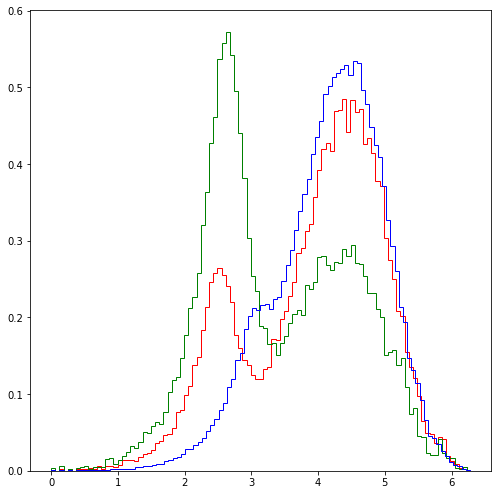

In [12]:
d_h3k4me3 = []
for mark in h3k4me3:
    closest_TSS = tss.getOneOfClosest(mark)
    d_h3k4me3.append(math.log10(bed.dist(mark, closest_TSS, centre2centre = True)+1))

d_h3k27ac = []
for mark in h3k27ac:
    closest_TSS = tss.getOneOfClosest(mark)
    d_h3k27ac.append(math.log10(bed.dist(mark, closest_TSS, centre2centre = True)+1))

h3k4me1 = bed.BedFile('H3K4me1.broadPeak')
d_h3k4me1 = []
for mark in h3k4me1:
    closest_TSS = tss.getOneOfClosest(mark)
    d_h3k4me1.append(math.log10(bed.dist(mark, closest_TSS, centre2centre = True)+1))

plt.figure(1, figsize=(8,8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
n, bs, ps = plt.hist(d_h3k27ac, 100, normed=1, color='r', histtype = 'step') #enhancer
n, bs, ps = plt.hist(d_h3k4me3, 100, normed=1, color='g', histtype = 'step') #promoter
n, bs, ps = plt.hist(d_h3k4me1, 100, normed=1, color='b', histtype = 'step') #enhancer
plt.show()

<a id="Exercise2"></a>
## Exercise 2: Transcription factor motif enrichment

You are now going to analyze some sequence data taken from ChIP-seq data and try to determine what motif describes the direct DNA binding by the transcription factor (TF) that was "pulled-down" in the immunoprecipitation experiment. The sequence data you are provided with is the genomic sequence around each of the "peak" regions declared by the "peak-calling" algorithm. The ultimate mission is to perform a type of "motif enrichment analysis" (Problem 3).

CEBPB is a transcription factor. Construct a FASTA file, containing all the DNA sequences with CEBPB binding sites, so that someone, maybe you, can do transcription factor binding motif discovery with it. 

Download ChIP-seq data from ENCODE for it in human embryonic stem cells. (Pick the narrowPeak file, also found in your directory as `CEBPB.narrowPeak`.)

In [15]:
cebpb = bed.BedFile('CEBPB.narrowPeak')
seqs = []
for b in cebpb:
    try:
        seqstr = hg19[b.chrom][b.chromStart:b.chromEnd]
        # note that seqstr may contain lower case DNA characters; convert below
        newseq = sequence.Sequence(seqstr.upper(), sym.DNA_Alphabet, str(b))
        # will fail if character is not one of A, C, G or T, e.g. if N
        if len(newseq) >= 200: # only add sequences at least 200bp
            seqs.append(newseq)
    except:
        print ('Failed to map', b.chrom, b.chromStart, b.chromEnd)
sequence.writeFastaFile('cebpb.fa', seqs)

Failed to map chr12 95478 95742
Failed to map chr18 9992 10256


We are interested in whether CEBPB is associated with promoters or enchancers. So you will need to measure distances again, and substantiate your conclusions with plots of distances between CEBPB binding sites and promoter and enhancer associated histone marks.

<span style="color:blue">**Question 2A: What is the mean distance between CEBPB binding sites and their closest H3K4me1 mark? Report to two decimal places.** 

<span style="color:blue">**Question 2B: Is CEBPB more likely to be associated with promoters or enhancers? Explain your reasoning**

In [16]:
#Question 2A
d_h3k4me1 = []
total_dist_h3k4me1 = 0
for mark in cebpb:
    closest_TSS = h3k4me1.getOneOfClosest(mark)
    d_h3k4me1.append(math.log10(bed.dist(mark, closest_TSS, centre2centre=True)+1))
for dist in d_h3k4me1:
    total_dist_h3k4me1 += dist
print(total_dist_h3k4me1/len(d_h3k4me1))

3.5629020083852376


Above we extracted from the reference genome a set of sequences, which CEBPB seems to bind to. While this sounds like a motif discovery problem, we may already know what the CEBPB motif looks like. We will therefore look at this as a motif *search* problem, and establish the statistical enrichment of CEBPB's motif. Specifically, we will investigate at what position the motif occurs. Step one, is to make sure all sequences are the same length around the centre of each peak. 

Write the code below to set the variable `seqs200` to be the 200-bp versions of those sequences extracted above (currently stored in the variable `seqs`).
They must be centred at the centre of the original peaks which can vary widely in size. (The expectation is that the TF binds in the middle, but that there will be variations due to the imprecision introduced by the experiment.)

In [17]:
seqs200 = []
for seq in seqs:
    if len(seq)//2 != len(seq)/2:
        new_seq = seq.sequence[0:-1]
    else:
        new_seq = seq.sequence
    while len(new_seq) > 200:
        new_seq = new_seq[1:-1]
    
    new_seq = sequence.Sequence(new_seq,sym.DNA_Alphabet, seq.name)
    seqs200.append(new_seq)
    
for seq in seqs200:
    if len(seq) != 200:
        print(seq.name)

<span style="color:blue">** Question 2C: To check that your code works - If we limit the length to be 20-bp, what does the following sequence become - chr1:3816802-3817066 ? **

JASPAR contains a large number of transcription factor binding motifs. You can download the whole database directly from their web site at http://jaspar.genereg.net. You can find the database in the notebook directory as `JASPAR_matrices.txt`. You can use `prob.py` to read in each motif as a list of probability distributions (over the DNA alphabet), like so:

In [18]:
d = prob.readMultiCounts('JASPAR_matrices.txt')
print ('Just loaded', len(d), 'sequence motifs as a dictionary')

Just loaded 661 sequence motifs as a dictionary


CEBPB is called `MA0466.1` in JASPAR. It is believed to have a couple of co-factors, including RUNX1 (called `MA0002.1` in JASPAR) and IRF1 (called `MA0050.2`).

In [19]:
print ('CEBPB is called MA0466.1 in JASPAR')
d['MA0466.1']

CEBPB is called MA0466.1 in JASPAR


In [20]:
# This will print all the column-specific distributions
for col in d['MA0466.1']:
    print (col)

< A=0.13 C=0.10 G=0.34 T=0.43  >
< A=0.76 C=0.06 G=0.19 T=0.00  >
< A=0.00 C=0.00 G=0.00 T=1.00  >
< A=0.00 C=0.00 G=0.00 T=1.00  >
< A=0.05 C=0.00 G=0.76 T=0.20  >
< A=0.00 C=1.00 G=0.00 T=0.00  >
< A=0.75 C=0.06 G=0.10 T=0.09  >
< A=0.09 C=0.52 G=0.00 T=0.39  >
< A=0.60 C=0.40 G=0.00 T=0.00  >
< A=1.00 C=0.00 G=0.00 T=0.00  >
< A=0.00 C=0.36 G=0.02 T=0.62  >


In [21]:
# You should already know how to make the list of distributions into a PWM
pwm1 = sequence.PWM(d['MA0466.1'])
pwm1.display(format='JASPAR')
print()
# The TF could bind to the reverse strand too
pwm2 = pwm1.getRC()
pwm2.display(format='JASPAR')

A	[ -0.65  +1.11 -25.33 -25.33  -1.70 -25.33  +1.10  -1.06  +0.88  +1.39 -25.33]
C	[ -0.91  -1.44 -25.33 -25.33 -25.33  +1.39  -1.51  +0.74  +0.46 -25.33  +0.37]
G	[ +0.30  -0.30 -25.33 -25.33  +1.11 -25.33  -0.91 -25.33 -25.33 -25.33  -2.50]
T	[ +0.54 -25.33  +1.39  +1.39  -0.25 -25.33  -0.99  +0.45 -25.33 -25.33  +0.90]

A	[ +0.90 -25.33 -25.33  +0.45  -0.99 -25.33  -0.25  +1.39  +1.39 -25.33  +0.54]
C	[ -2.50 -25.33 -25.33 -25.33  -0.91 -25.33  +1.11 -25.33 -25.33  -0.30  +0.30]
G	[ +0.37 -25.33  +0.46  +0.74  -1.51  +1.39 -25.33 -25.33 -25.33  -1.44  -0.91]
T	[-25.33  +1.39  +0.88  -1.06  +1.10 -25.33  -1.70 -25.33 -25.33  +1.11  -0.65]


ChIP-seq identifies fragments of DNA that the target protein binds to. While those fragments can be of different sizes, on average we expect any trace of binding to be enriched in the centre. To verify that this is the case, we first check that all sequences are the same length.

In [22]:
seq_len = len(seqs200[0])
for seq in seqs200:
    if len(seq) != seq_len:
        print ('Error: all sequences must be of the same length, and', seq.name, 'is', len(seq), 'and not', seq_len)
        break

If this turns out to be true (which it should if you managed to solve the problem above), we can determine the average position-specific score over all DNA sequences. The following code will plot those average scores. (It takes a couple of minutes to execute.)

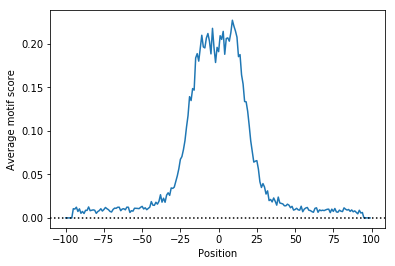

In [23]:
""" Produce a plot for the "average scan" of the specified motif. 
    The plot has as its x-axis position of sequence, and 
    the y-axis the average PWM score over all sequences. 
    Make sure the following variables are set correctly before running:
        seqs200 - all sequences to be scanned, must be same lengths
        pwm1 - PWM
        pwm2 - PWM reverse strand
"""
threshold = 0 # the minimum score for a match
seq_len = len(seqs200[0])
# initialize things to zero
avg_motif_score1 = np.zeros(seq_len)
# compute average score at each position (on both strands) in sequences
i_seq = 0
motif_width = pwm1.length
for seq in seqs200:
    i_seq += 1
    # positive strand
    hits = pwm1.search(seq, threshold)
    pos_scores = seq_len * [0]
    for hit in hits:
        # mark hit at *center* of site (hence motif_width//2)
        pos_scores[hit[0]+(motif_width//2)] = hit[2]
    # negative strand
    hits = pwm2.search(seq, threshold)
    neg_scores = seq_len * [0]
    for hit in hits:
        neg_scores[hit[0]+(motif_width//2)] = hit[2]
    # for each position use the maximum score of the two strands
    for i in range(seq_len):
        score = max(pos_scores[i], neg_scores[i])
        if (score > threshold):
            avg_motif_score1[i] += score
# compute average score
for i in range(seq_len):
    avg_motif_score1[i] /= len(seqs200)
# plot the average score curve
x = range(-(seq_len//2), (seq_len//2))    # call center of sequence X=0
plt.plot(x, avg_motif_score1)
plt.axhline(color='black', linestyle='dotted')
plt.xlabel('Position')
plt.ylabel('Average motif score')
plt.show()

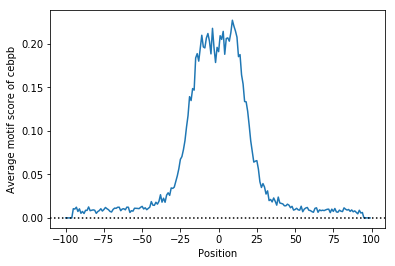

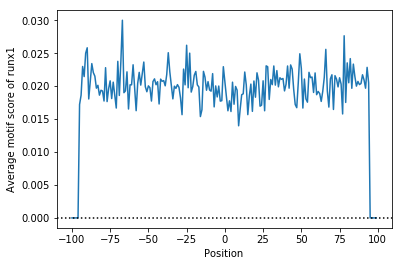

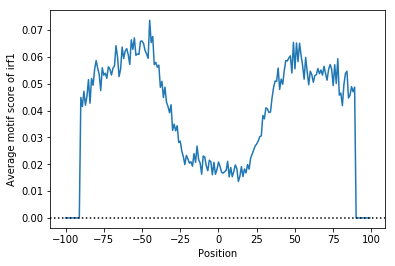

In [24]:
pwm_dic = {}
pwm_dic["cebpb"] = d['MA0466.1']
pwm_dic["runx1"] = d['MA0002.1']
pwm_dic["irf1"] = d['MA0050.2']

threshold = 0 # the minimum score for a match
seq_len = len(seqs200[0])

for key in pwm_dic:
    pwm1 = sequence.PWM(pwm_dic[key])
    pwm2 = pwm1.getRC()
    # initialize things to zero
    avg_motif_score1 = np.zeros(seq_len)
    # compute average score at each position (on both strands) in sequences
    i_seq = 0
    motif_width = pwm1.length
    for seq in seqs200:
        i_seq += 1
        # positive strand
        hits = pwm1.search(seq, threshold)
        pos_scores = seq_len * [0]
        for hit in hits:
            # mark hit at *center* of site (hence motif_width//2)
            pos_scores[hit[0]+(motif_width//2)] = hit[2]
        # negative strand
        hits = pwm2.search(seq, threshold)
        neg_scores = seq_len * [0]
        for hit in hits:
            neg_scores[hit[0]+(motif_width//2)] = hit[2]
        # for each position use the maximum score of the two strands
        for i in range(seq_len):
            score = max(pos_scores[i], neg_scores[i])
            if (score > threshold):
                avg_motif_score1[i] += score
    # compute average score
    for i in range(seq_len):
        avg_motif_score1[i] /= len(seqs200)
    
    # plot the average score curve
    x = range(-(seq_len//2), (seq_len//2))    # call center of sequence X=0
    plt.plot(x, avg_motif_score1)
    plt.axhline(color='black', linestyle='dotted')
    plt.xlabel('Position')
    plt.ylabel('Average motif score of '+str(key))
    plt.show()

Use a similar approach to the code in the above cell to establish if there is a co-factor with CEBPB in human embryonic stem cells. You can search the literature (PubMed http://www.ncbi.nlm.nih.gov/pubmed/) for candidates, but to limit your work, check with the two identified above (RUNX1 and IRF1). Explain what you see in both technical and biological terms.

<span style="color:blue">**Question 2D: Which of the following statements are true? Check all that apply.**
<br> The scale on the y-axis always remains the same
<br> The code takes the average of the results from the forward and reverse strand
<br> The three binding motifs (CEBPB, RUNX1, and IRF1) all show different binding patterns

<span style="color:blue">**Question 2E: Explain the approach to establish if there is a co-factor with CEBPB in human embryonic stem cells and report what you determined.**</span> 